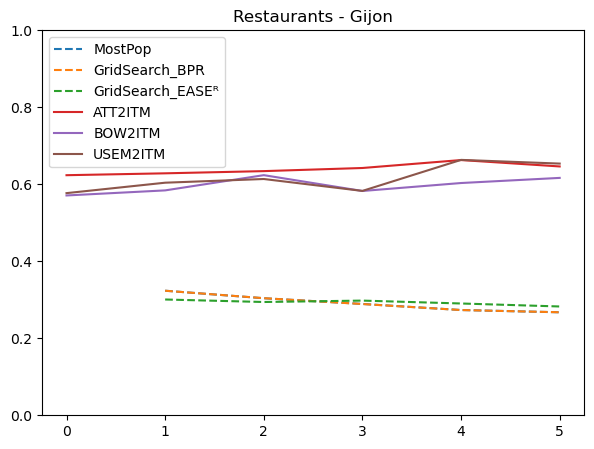

ValueError: 

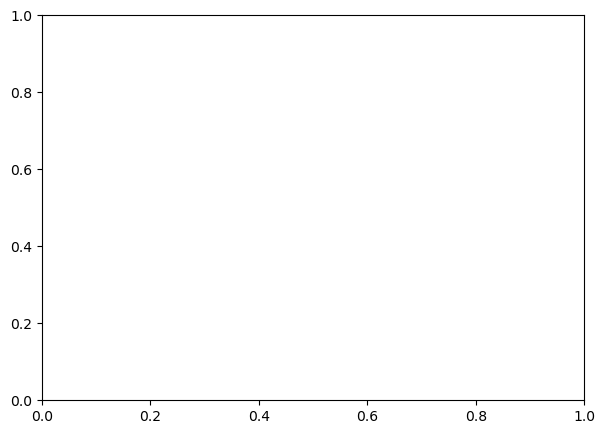

In [15]:
# Importar pandas
import matplotlib.pyplot as plt
import pandas as pd
import os

top = 5
datasets = {"restaurants":["gijon", "barcelona", "madrid", "paris", "newyorkcity"],
            "pois":["barcelona", "madrid", "paris", "newyorkcity", "london"],
            "amazon":["fashion", "digital_music"]}
models = ["ATT2ITM", "BOW2ITM", "USEM2ITM"]

best_model = pd.read_csv("models/best_models.csv")

for dataset, subsets in datasets.items():
    for subset in subsets:
        fig, ax = plt.subplots(figsize=(7, 5))
        subset_results = pd.DataFrame(range(top+1), columns=["train_dev_items"])
        
        baseline_path = f"models/Baselines/{dataset}/{subset}/user_results.csv"
        if os.path.exists(baseline_path): 
            baselines = pd.read_csv(baseline_path).rename(columns={"cold":"train_dev_items"})
            baselines = baselines.groupby("train_dev_items")[["MostPop", "GridSearch_BPR", "GridSearch_EASEᴿ"]].mean().reset_index()
            subset_results = subset_results.merge(baselines, how="left")

            for bl in ["MostPop", "GridSearch_BPR", "GridSearch_EASEᴿ"]: ax.plot(subset_results["train_dev_items"], subset_results[bl], '--', label=bl)

        else: raise ValueError

        for model in models:
            md5 = best_model.loc[(best_model.dataset == dataset) & (best_model.subset == subset) & (best_model.model == model)]["model_md5"].values[0]
            results_path = f"models/{model}/{dataset}/{subset}/{md5}/final_user_eval.csv"
            if os.path.exists(results_path):
                results = pd.read_csv(results_path)
                results = results.groupby("cold").agg(mn=("NDCG", "mean"), n_samples=("NDCG", "count")).reset_index().rename(columns={"cold":"train_dev_items", "mn":model})
                subset_results = subset_results.merge(results, how="left")
                ax.plot(subset_results["train_dev_items"], subset_results[model], label=model)
            else:
                raise ValueError
        
        # print(subset_results)

        # ax.plot(subset_results["train_dev_items"], subset_results["n_samples"])

        plt.ylim([0, 1])
        plt.title(f"{dataset.title()} - {subset.title()}")
        plt.legend()
        plt.show()

In [31]:
pd.read_csv(results_path)

,Unnamed: 0,reviewId,userId,id_item,name,bow,seq,NDCG,cold
0,0,671654,A2SDJZO3FETVB6,28,0,190384,190384,0.115402,0.0
1,1,737226,AFMRW65TM4JJ8,28,0,191776,191776,0.115593,0.0
2,2,692707,AIQQ7VJMHV47L,28,0,194096,194096,0.114530,0.0
3,3,816010,A2YTSM9WLL9Z1E,718,0,197562,197562,0.102851,1.0
4,4,299086,A2L8YG5P5EKCKY,242,0,198445,198445,0.101188,2.0
...,...,...,...,...,...,...,...,...,...
23430,23430,93788,A1WDPC01O99OGV,335,0,238727,238727,0.110802,0.0
23431,23431,345400,A2O8IB4KMYW05Z,314,0,238728,238728,0.102235,2.0
23432,23432,1085584,AGEW8TWYQCN6M,894,0,238729,238729,0.185449,0.0
23433,23433,156470,AGY7P1W3JWLSX,296,0,238730,238730,0.185449,0.0


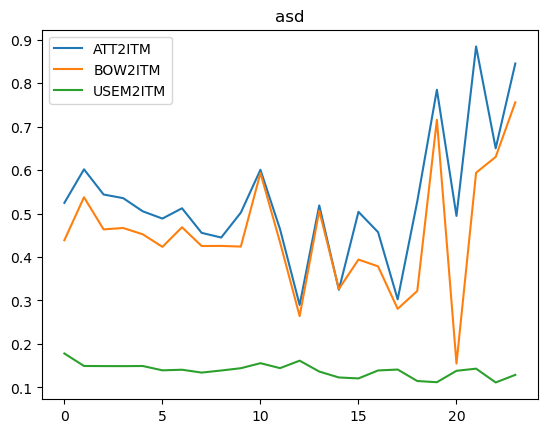

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for model in models:
    ax.plot(subset_results["train_dev_items"], subset_results[model], label=model)

plt.title("asd")
plt.legend()
plt.show()

In [5]:
subset_results

,train_dev_items,ATT2ITM,BOW2ITM,USEM2ITM
0,0,0.524603,0.438658,0.178098
1,1,0.601652,0.537455,0.149381
2,2,0.543727,0.463537,0.149164
3,3,0.535374,0.466753,0.149068
4,4,0.505019,0.452175,0.149325
5,5,0.488397,0.423337,0.139377
6,6,0.512085,0.468437,0.140776
7,7,0.455558,0.425268,0.134205
8,8,0.444787,0.425523,0.138979
9,9,0.502080,0.424005,0.144287
